In [1]:
# !pip install seaborn

In [2]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
import pandas as pd
import h5py

In [3]:
# DIR = 'C:/Users/hezo/Downloads/UTKFace/UTKFace/'
DIR = '/tf/notebooks/data/UTKFace/UTKFace/'

In [4]:
im_names = os.listdir(DIR)
im_paths = [DIR + i for i in im_names]
print(im_names[:3], im_paths[:3])

['82_0_2_20170111210110290.jpg.chip.jpg', '32_1_2_20170116180211518.jpg.chip.jpg', '21_0_4_20170103225103768.jpg.chip.jpg'] ['/tf/notebooks/data/UTKFace/UTKFace/82_0_2_20170111210110290.jpg.chip.jpg', '/tf/notebooks/data/UTKFace/UTKFace/32_1_2_20170116180211518.jpg.chip.jpg', '/tf/notebooks/data/UTKFace/UTKFace/21_0_4_20170103225103768.jpg.chip.jpg']


In [5]:
im_names[0].split('_')

['82', '0', '2', '20170111210110290.jpg.chip.jpg']

In [6]:
age = [] # 0-116
gender = [] # 0 = male, 1 = female
race = [] # 0 = White, 1 = Black, 2 = Asian, 3 = Indian, 4 = Others (like Hispanic, Latino, Middle Eastern)
path = []
name = []
for i, im in enumerate(im_names):
    splt = im.split('_')
    if len(splt) == 4: # there are three images having no race --> exclude them
        age.append(splt[0])
        gender.append(splt[1])
        race.append(splt[2])
        path.append(im_paths[i])
        name.append(im)
        
age = np.array(age, dtype = 'int')
gender = np.array(gender, dtype = 'int')
race = np.array(race, dtype = 'int')
path = np.array(path)
name = np.array(name)
print(age.shape, gender.shape, race.shape, path.shape, name.shape)

(23705,) (23705,) (23705,) (23705,) (23705,)


In [7]:
dat = pd.DataFrame({'age': age, 'gender': gender, 'race': race, 'path': path, 'id': name})
dat.head(3)

,age,gender,race,path,id
0,82,0,2,/tf/notebooks/data/UTKFace/UTKFace/82_0_2_2017...,82_0_2_20170111210110290.jpg.chip.jpg
1,32,1,2,/tf/notebooks/data/UTKFace/UTKFace/32_1_2_2017...,32_1_2_20170116180211518.jpg.chip.jpg
2,21,0,4,/tf/notebooks/data/UTKFace/UTKFace/21_0_4_2017...,21_0_4_20170103225103768.jpg.chip.jpg


(array([3413., 2631., 9063., 3140., 2688., 1398.,  854.,  446.,   54.,
          18.]),
 array([  1. ,  12.5,  24. ,  35.5,  47. ,  58.5,  70. ,  81.5,  93. ,
        104.5, 116. ]),
 <a list of 10 Patch objects>)

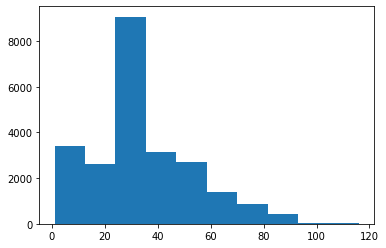

In [8]:
plt.hist(dat.age, bins = 10)

In [9]:
# define the age groups
dat['age_group'] = pd.cut(dat.age, (0, 4, 13, 20, 31, 46, 61, 117), right = False)
dat.head(5)

,age,gender,race,path,id,age_group
0,82,0,2,/tf/notebooks/data/UTKFace/UTKFace/82_0_2_2017...,82_0_2_20170111210110290.jpg.chip.jpg,"[61, 117)"
1,32,1,2,/tf/notebooks/data/UTKFace/UTKFace/32_1_2_2017...,32_1_2_20170116180211518.jpg.chip.jpg,"[31, 46)"
2,21,0,4,/tf/notebooks/data/UTKFace/UTKFace/21_0_4_2017...,21_0_4_20170103225103768.jpg.chip.jpg,"[20, 31)"
3,27,1,2,/tf/notebooks/data/UTKFace/UTKFace/27_1_2_2017...,27_1_2_20170116171716287.jpg.chip.jpg,"[20, 31)"
4,26,0,4,/tf/notebooks/data/UTKFace/UTKFace/26_0_4_2017...,26_0_4_20170117153355923.jpg.chip.jpg,"[20, 31)"


In [10]:
np.unique(dat.age_group, return_counts = True)

(array([Interval(0, 4, closed='left'), Interval(4, 13, closed='left'),
        Interval(13, 20, closed='left'), Interval(20, 31, closed='left'),
        Interval(31, 46, closed='left'), Interval(46, 61, closed='left'),
        Interval(61, 117, closed='left')], dtype=object),
 array([1894, 1519, 1180, 8068, 5433, 3216, 2395]))

In [11]:
# dat.to_csv('/tf/notebooks/data/UTKFace/UTKFace.csv', index = False)

(200, 200, 3)


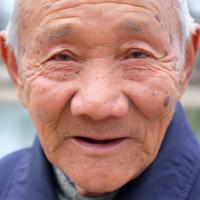

In [12]:
im = Image.open(dat.path[0])
im_pix = np.array(im)
print(im_pix.shape)
im

In [13]:
X = np.zeros((len(dat), im_pix.shape[0], im_pix.shape[1], im_pix.shape[2]), dtype = 'uint8')
for i, p in enumerate(dat.path):
    im = Image.open(p)
    im_pix = np.array(im)
    X[i] = im_pix
X.shape

(23705, 200, 200, 3)

In [14]:
# normalize
X = X/255

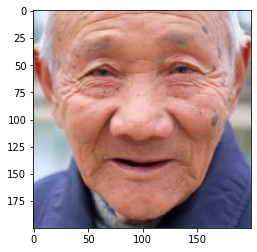

In [15]:
plt.imshow(X[0])

In [16]:
# resize: need to do in multiple steps otherwise memory error
import tensorflow as tf
X0 = tf.image.resize(X[:10000], size = (128, 128))
X1 = tf.image.resize(X[10000:15000], size = (128, 128))
X2 = tf.image.resize(X[15000:], size = (128, 128))

In [17]:
X = np.concatenate([X0, X1, X2], axis = 0)
X.shape

(23705, 128, 128, 3)

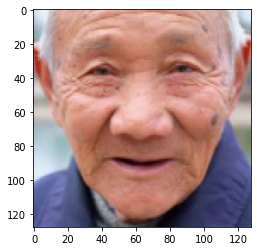

In [18]:
plt.imshow(X[0])

In [19]:
np.random.seed(3004)
idx = np.arange(len(dat))
np.random.shuffle(idx)
# idx[:10]

train_idx = idx[:int(len(dat)*0.8)] # 80% training
test_idx = idx[int(len(dat)*0.8):] # 20% test
valid_idx = train_idx[:int(len(train_idx)*0.2)] # 20% of training as validation
train_idx = train_idx[int(len(train_idx)*0.2):]
print(train_idx.shape, valid_idx.shape, test_idx.shape)

(15172,) (3792,) (4741,)


In [20]:
# sanity check: no duplicated indices
# test_in_train = [i in train_idx for i in test_idx]
# test_in_valid = [i in valid_idx for i in test_idx]
# train_in_valid = [i in valid_idx for i in train_idx]
# print(any(test_in_train), any(test_in_valid), any(train_in_valid))

In [22]:
# load simulated data
dat_sim = pd.read_csv('/tf/notebooks/data/UTKFace/simulated_from_UTKFace.csv', index_col = False, 
                      # Problem mir dem Komma in age_group -> liest es als zwei Spalten ein...
                      header = 0, 
                      names = ['age', 'gender', 'race', 'path', 'id', 'age_group_l', 'age_group_u',
                                'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10'],
                     usecols = ['id', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10'])
dat_sim.head(3)

,id,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10
0,82_0_2_20170111210110290.jpg.chip.jpg,-0.528451,3.651150,-2.834117,0.872736,1.314714,0.211141,-0.397263,3.422563,-1.225158,0.186638
1,32_1_2_20170116180211518.jpg.chip.jpg,1.251449,-0.980524,-0.975157,0.502019,0.389981,-1.156847,0.435604,2.757044,-2.115146,2.115494
2,21_0_4_20170103225103768.jpg.chip.jpg,-0.780822,-0.638521,0.576161,0.524777,1.255247,2.702789,1.613970,0.642738,0.863374,1.039977


In [23]:
dat0 = dat

In [24]:
# combine the data and the simulated data
dat = dat.merge(dat_sim, on = ['id'])
dat.head(3)

,age,gender,race,path,id,age_group,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10
0,82,0,2,/tf/notebooks/data/UTKFace/UTKFace/82_0_2_2017...,82_0_2_20170111210110290.jpg.chip.jpg,"[61, 117)",-0.528451,3.651150,-2.834117,0.872736,1.314714,0.211141,-0.397263,3.422563,-1.225158,0.186638
1,32,1,2,/tf/notebooks/data/UTKFace/UTKFace/32_1_2_2017...,32_1_2_20170116180211518.jpg.chip.jpg,"[31, 46)",1.251449,-0.980524,-0.975157,0.502019,0.389981,-1.156847,0.435604,2.757044,-2.115146,2.115494
2,21,0,4,/tf/notebooks/data/UTKFace/UTKFace/21_0_4_2017...,21_0_4_20170103225103768.jpg.chip.jpg,"[20, 31)",-0.780822,-0.638521,0.576161,0.524777,1.255247,2.702789,1.613970,0.642738,0.863374,1.039977


In [25]:
dat.shape

(23705, 16)

In [26]:
dat.age_group = dat.age_group.cat.rename_categories(np.arange(7))

In [27]:
dat.head(3)

,age,gender,race,path,id,age_group,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10
0,82,0,2,/tf/notebooks/data/UTKFace/UTKFace/82_0_2_2017...,82_0_2_20170111210110290.jpg.chip.jpg,6,-0.528451,3.651150,-2.834117,0.872736,1.314714,0.211141,-0.397263,3.422563,-1.225158,0.186638
1,32,1,2,/tf/notebooks/data/UTKFace/UTKFace/32_1_2_2017...,32_1_2_20170116180211518.jpg.chip.jpg,4,1.251449,-0.980524,-0.975157,0.502019,0.389981,-1.156847,0.435604,2.757044,-2.115146,2.115494
2,21,0,4,/tf/notebooks/data/UTKFace/UTKFace/21_0_4_2017...,21_0_4_20170103225103768.jpg.chip.jpg,3,-0.780822,-0.638521,0.576161,0.524777,1.255247,2.702789,1.613970,0.642738,0.863374,1.039977


In [28]:
# Encode strings to save
def encode_data(string):
    encoded_string = [n.encode('UTF-8', 'ignore') for n in string]
    return(encoded_string)

# def decode_data(string):
#     decoded_string = [n.decode('UTF-8', 'ignore') for n in string]
#     return(decoded_string)

In [29]:
with h5py.File('/tf/notebooks/data/UTKFace/UTKFace.h5', 'w') as h5:
    h5.create_dataset('X_train', data = X[train_idx])
    h5.create_dataset('X_valid', data = X[valid_idx])
    h5.create_dataset('X_test', data = X[test_idx])
    h5.create_dataset('age_train', data = dat.age[train_idx].values)
    h5.create_dataset('age_valid', data = dat.age[valid_idx].values)
    h5.create_dataset('age_test', data = dat.age[test_idx].values)
    h5.create_dataset('age_group_train', data = dat.age_group[train_idx].values)
    h5.create_dataset('age_group_valid', data = dat.age_group[valid_idx].values)
    h5.create_dataset('age_group_test', data = dat.age_group[test_idx].values)
    h5.create_dataset('gender_train', data = dat.gender[train_idx].values)
    h5.create_dataset('gender_valid', data = dat.gender[valid_idx].values)
    h5.create_dataset('gender_test', data = dat.gender[test_idx].values)
    h5.create_dataset('race_train', data = dat.race[train_idx].values)
    h5.create_dataset('race_valid', data = dat.race[valid_idx].values)
    h5.create_dataset('race_test', data = dat.race[test_idx].values)
    h5.create_dataset('id_train', data = encode_data(dat.id[train_idx].values))
    h5.create_dataset('id_valid', data = encode_data(dat.id[valid_idx].values))
    h5.create_dataset('id_test', data = encode_data(dat.id[test_idx].values))
    h5.create_dataset('x_1_train', data = dat.x_1[train_idx].values)
    h5.create_dataset('x_1_valid', data = dat.x_1[valid_idx].values)
    h5.create_dataset('x_1_test', data = dat.x_1[test_idx].values)
    h5.create_dataset('x_2_train', data = dat.x_2[train_idx].values)
    h5.create_dataset('x_2_valid', data = dat.x_2[valid_idx].values)
    h5.create_dataset('x_2_test', data = dat.x_2[test_idx].values)
    h5.create_dataset('x_3_train', data = dat.x_3[train_idx].values)
    h5.create_dataset('x_3_valid', data = dat.x_3[valid_idx].values)
    h5.create_dataset('x_3_test', data = dat.x_3[test_idx].values)
    h5.create_dataset('x_4_train', data = dat.x_4[train_idx].values)
    h5.create_dataset('x_4_valid', data = dat.x_4[valid_idx].values)
    h5.create_dataset('x_4_test', data = dat.x_4[test_idx].values)
    h5.create_dataset('x_5_train', data = dat.x_5[train_idx].values)
    h5.create_dataset('x_5_valid', data = dat.x_5[valid_idx].values)
    h5.create_dataset('x_5_test', data = dat.x_5[test_idx].values)
    h5.create_dataset('x_6_train', data = dat.x_6[train_idx].values)
    h5.create_dataset('x_6_valid', data = dat.x_6[valid_idx].values)
    h5.create_dataset('x_6_test', data = dat.x_6[test_idx].values)
    h5.create_dataset('x_7_train', data = dat.x_7[train_idx].values)
    h5.create_dataset('x_7_valid', data = dat.x_7[valid_idx].values)
    h5.create_dataset('x_7_test', data = dat.x_7[test_idx].values)
    h5.create_dataset('x_8_train', data = dat.x_8[train_idx].values)
    h5.create_dataset('x_8_valid', data = dat.x_8[valid_idx].values)
    h5.create_dataset('x_8_test', data = dat.x_8[test_idx].values)
    h5.create_dataset('x_9_train', data = dat.x_9[train_idx].values)
    h5.create_dataset('x_9_valid', data = dat.x_9[valid_idx].values)
    h5.create_dataset('x_9_test', data = dat.x_9[test_idx].values)
    h5.create_dataset('x_10_train', data = dat.x_10[train_idx].values)
    h5.create_dataset('x_10_valid', data = dat.x_10[valid_idx].values)
    h5.create_dataset('x_10_test', data = dat.x_10[test_idx].values)